<a href="https://colab.research.google.com/github/danismoreirasilva/machine_learning_dp_ufsc/blob/main/regressao_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Polinomial

## ETL - Carga dos dados

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Doutorado UFSC/Machine Learning e Deepen Learning/Datasets/Position_Salaries.csv')

df.head(1)

,Position,Level,Salary
0,Business Analyst,1,45000


In [11]:
#Separando as variaveis independentes (X) da variável target, alvo, (y)

X = df.iloc[:,1:2]

#y = df.iloc[:,2:] - assim pega a coluna com o título -todas as colunas após a posição 2

#aqui está pegando apenas a coluna 2, mas nao veio o titulo, vem como tipo objeto inteiro
y = df.iloc[:,2]

## Separação dos Conjuntos de Treinamento e Testes

In [13]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((8, 1), (2, 1), (8,), (2,))

## Lidar com graus de polinômio

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

#definindo grau 2 para esse polinomio
poli = PolynomialFeatures(degree=2)

#pegar o conjunto de treinmaneto e passar pelo polinomio
X_poli = poli.fit_transform(X_treino)
X_poli

In [ ]:
X_treino

## Regressão Polinomial

In [16]:
from sklearn.linear_model import LinearRegression

#utilizar o dataset polinomial para fazer o fit

modelo = LinearRegression()
modelo.fit(X_poli, y_treino)

LinearRegression()

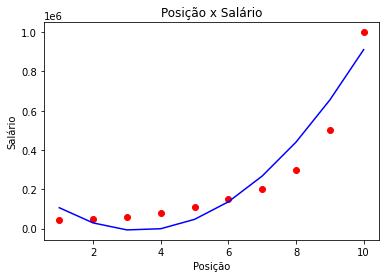

In [20]:
import matplotlib.pyplot as plt

#gráfico plotado com o polinomio grau 2
plt.scatter(X, y, color = 'red')
plt.plot(X, modelo.predict(poli.fit_transform(X)), color = 'blue')
plt.title('Posição x Salário')
plt.xlabel('Posição')
plt.ylabel('Salário')
plt.show()

In [27]:
from sklearn.preprocessing import PolynomialFeatures

#aqui fui trocando os graus do polinomio para visualiazar o melhor resultado
poly = PolynomialFeatures(degree=5)

#pegar o conjunto de treinmaneto e passar pelo polinomio
X_poly = poly.fit_transform(X_treino)
X_poly

array([[1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03]])

In [28]:
from sklearn.linear_model import LinearRegression

#utilizar o dataset polinomial para fazer o fit

model = LinearRegression()
model.fit(X_poly, y_treino)

LinearRegression()

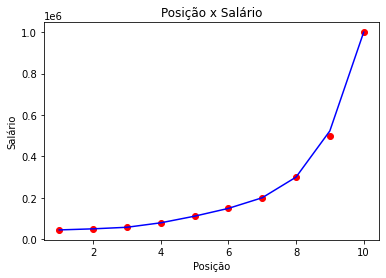

In [29]:
#gráfico plotado com o polinomio grau 3 - troquei o nome das variaveis
plt.scatter(X, y, color = 'red')
plt.plot(X, model.predict(poly.fit_transform(X)), color = 'blue')
plt.title('Posição x Salário')
plt.xlabel('Posição')
plt.ylabel('Salário')
plt.show()

#após vários testes, o grau 5 deu o melhor resultado